
# Heavy light decomposition

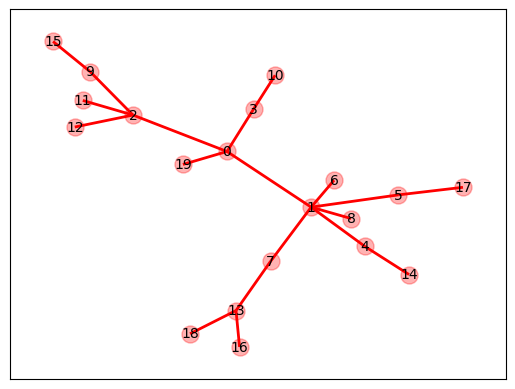

In [71]:
# generate a random tree with 100 nodes

import random
import matplotlib.pyplot as plt
import math
import collections
import networkx as nx
def generate_tree(n):
  g = nx.Graph()

  for i in range(1, n):
    g.add_edge(i, random.randint(0, i - 1))
  
  return g

g = generate_tree(20)

pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size = 150, node_color = 'red', alpha = 0.3)
nx.draw_networkx_edges(g, pos, edgelist = g.edges() , edge_color = 'r', width = 2)
nx.draw_networkx_labels(g, pos, font_size = 10, font_family = 'sans-serif')
plt.show()


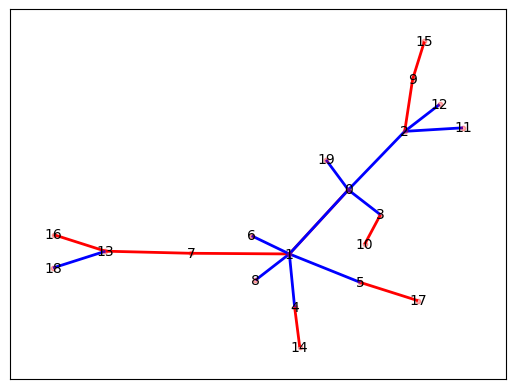

In [72]:
def get_adj(g):
  adj = collections.defaultdict(list)
  for u, v in g.edges():
    adj[u].append(v)
    adj[v].append(u)
  return adj
adj = get_adj(g)

def HLD(adj):
  heavy = [None] * len(adj)
  size = [1] * len(adj)
  heavy_edge_list = []
  def dfs(node, parent):
    for child in adj[node]:
      if child != parent :
        dfs(child, node)
        size[node] += size[child]
        if heavy[node] == None or size[child] > size[heavy[node]]:
          heavy[node] = child
    if heavy[node] : 
      heavy_edge_list.append((node, heavy[node]))
    
  dfs(0, None)
  return heavy_edge_list

heavy_edge_list = HLD(get_adj(g))


# draw heavy edges as red and light edges as blue

def draw_hld(g, heavy_edge_list):
  pos = nx.spring_layout(g)
  
  nx.draw_networkx_nodes(g, pos, node_size = 10, node_color = 'red', alpha = 0.3)
  nx.draw_networkx_edges(g, pos, edgelist = heavy_edge_list, edge_color = 'r', width = 2)
  nx.draw_networkx_edges(g, pos, edgelist = list(set(g.edges()) - set(heavy_edge_list)), edge_color = 'b', width = 2)
  nx.draw_networkx_labels(g, pos, font_size = 10, font_family = 'sans-serif')
  plt.show()

draw_hld(g, heavy_edge_list)